<a href="https://colab.research.google.com/github/Shweta-sharma-1998/Assignmet/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
df =pd.read_csv('/content/survey_results_public.csv')
df1=pd.read_csv('/content/survey_results_schema.csv')

In [82]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [83]:
df1.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [84]:
df.shape, df1.shape

((64461, 61), (61, 2))

In [85]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

###EXPLORATORY DATA ANALYSIS

In [86]:
df["YearsCodePro"].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [87]:
df["YearsCodePro"].replace({"Less than 1 year": 0, 'More than 50 years':51}, inplace= True)
df["YearsCodePro"]= df["YearsCodePro"].dropna()


In [88]:
df["YearsCodePro"].isnull().sum()

18112

In [89]:
df= df.dropna(subset= ["YearsCodePro"])

In [90]:
df.isnull().sum()

Respondent                0
MainBranch               78
Hobbyist                  0
Age                    9497
Age1stCode              100
                      ...  
WebframeWorkedWith    12753
WelcomeChange          5332
WorkWeekHrs            5427
YearsCode               128
YearsCodePro              0
Length: 61, dtype: int64

In [91]:
df['Employment'].value_counts()

Employed full-time                                      39954
Independent contractor, freelancer, or self-employed     4719
Employed part-time                                       1512
Name: Employment, dtype: int64

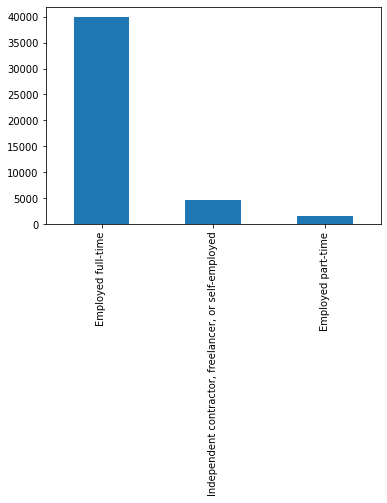

In [92]:
df['Employment'].value_counts().plot(kind='bar')

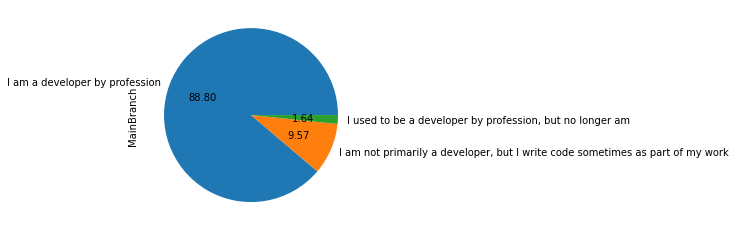

In [93]:
df['MainBranch'].value_counts().plot(kind='pie', autopct='%0.2f')

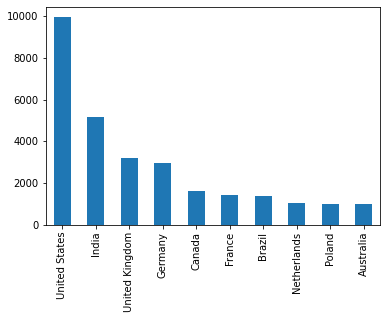

In [94]:
df['Country'].value_counts().head(10).plot(kind='bar')

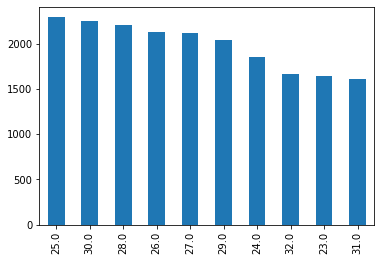

In [95]:
df['Age'].value_counts().head(10).plot(kind='bar')

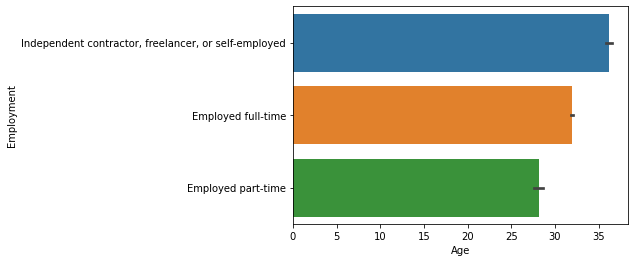

In [96]:
sns.barplot(x='Age',y= 'Employment',data=df)

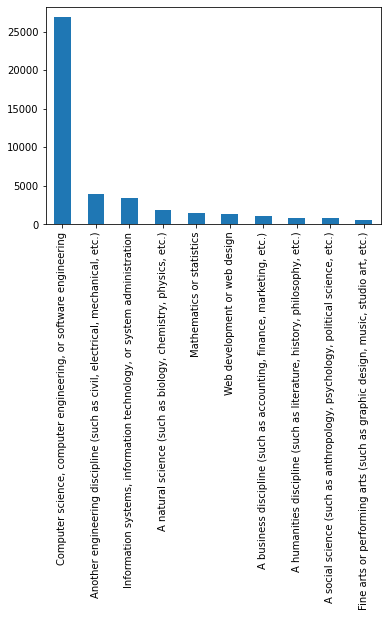

In [97]:
df['UndergradMajor'].value_counts().head(10).plot(kind='bar')

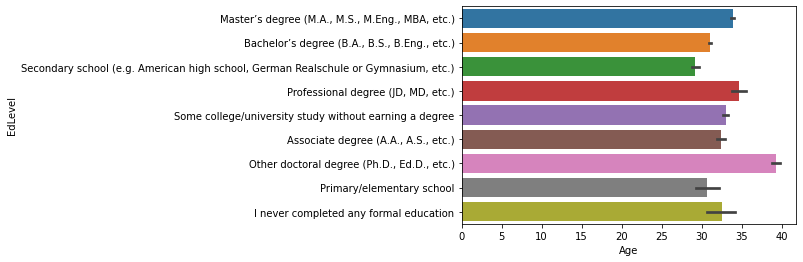

In [98]:
sns.barplot(x='Age',y= 'EdLevel',data=df)

###Let's see how many professional developers have mentioned coding as their hobby¶

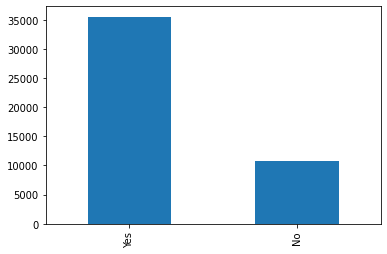

In [99]:
df['Hobbyist'].value_counts().plot(kind='bar')

###ANALYSIS ON WORK WEEK HOURS

In [100]:
work_hrs=df.groupby('Country')['WorkWeekHrs'].sum().sort_values(ascending=False).head().reset_index()

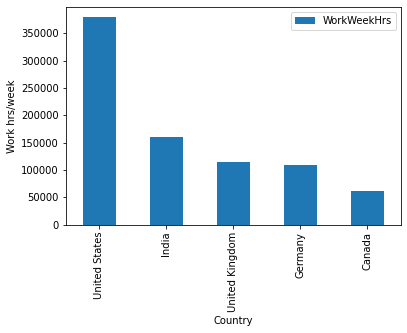

In [101]:
work_hrs.plot.bar(x='Country',y='WorkWeekHrs')
plt.xlabel('Country',fontsize=10)
plt.ylabel("Work hrs/week",fontsize=10)
plt.show()

In [102]:
from wordcloud import WordCloud, STOPWORDS

In [103]:
def generate_word_column(column,colour):
    
    words = ''
    for i in df[column]:
        try:
            a=i.split(';')
            for j in a:
                words+=' '+ j
        except:
            a=-999

    word_cloud = WordCloud(background_color=colour,max_font_size=300,width=2000, height=1080).generate(words)
    plt.figure(figsize=(20,8))
    plt.imshow(word_cloud)

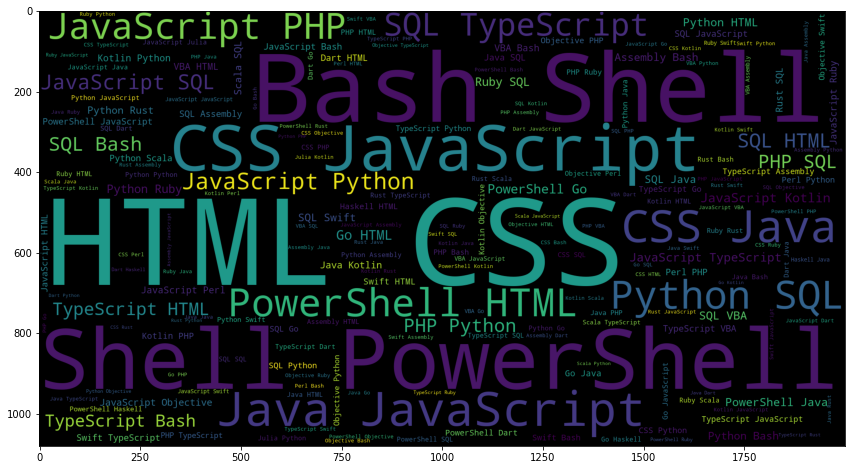

In [104]:
generate_word_column('LanguageWorkedWith','Black')

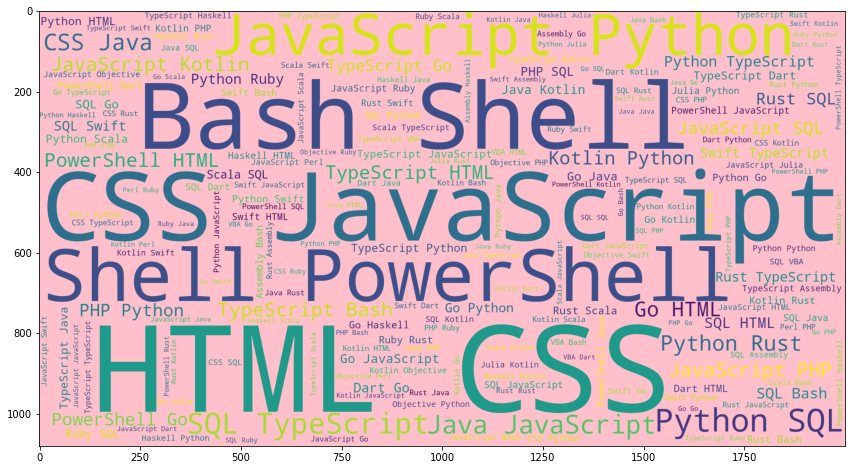

In [105]:
generate_word_column('LanguageDesireNextYear','Pink')

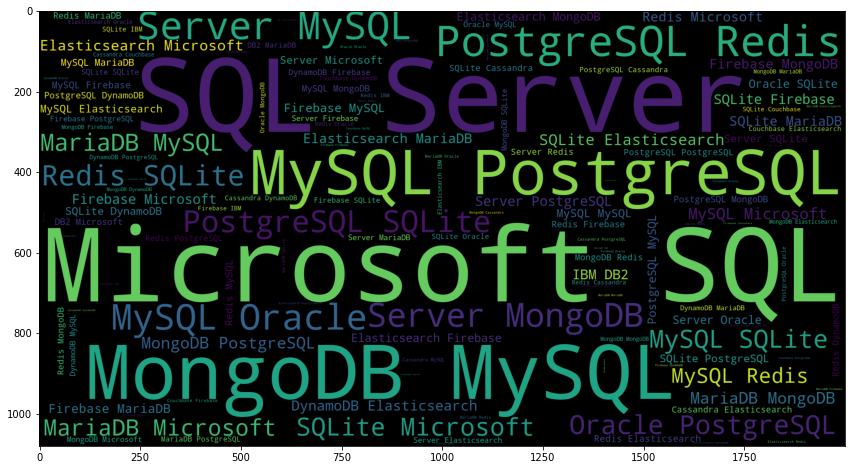

In [106]:
generate_word_column('DatabaseWorkedWith','Black')

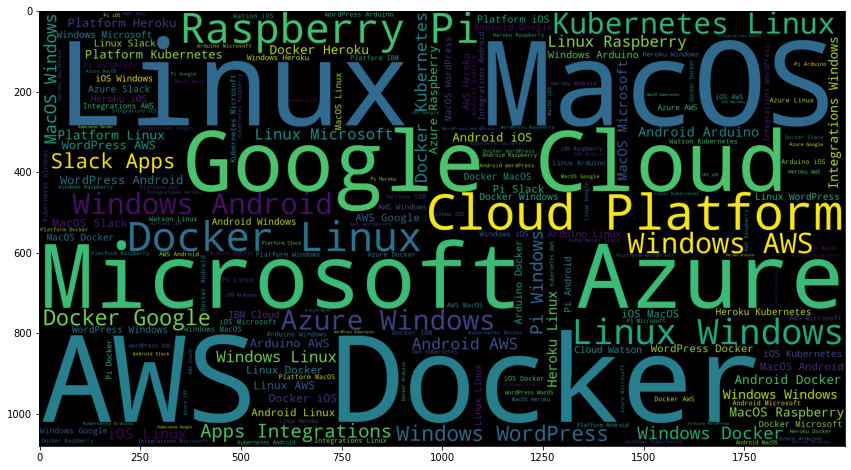

In [107]:
generate_word_column('PlatformWorkedWith','Black')

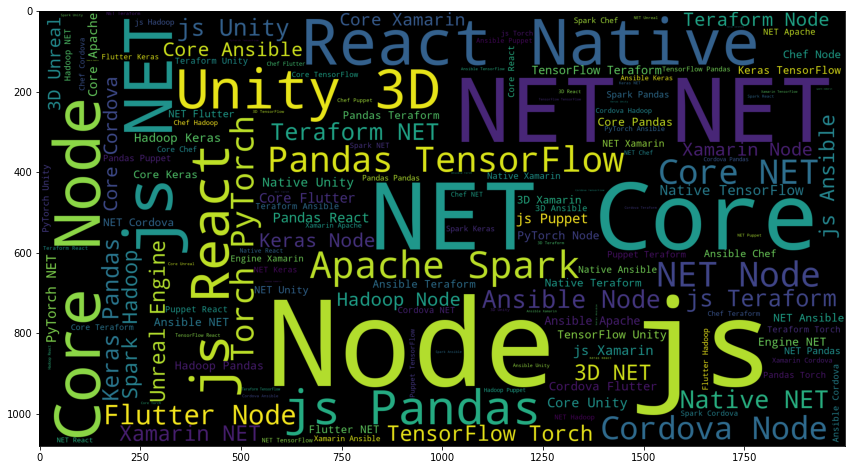

In [108]:
generate_word_column('MiscTechWorkedWith','Black')

###Analysis on age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


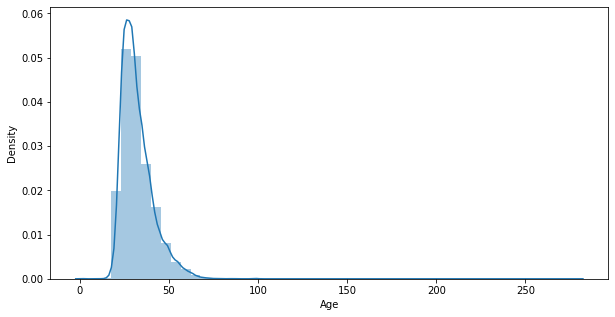

In [109]:
age=df['Age'].dropna()
plt.figure(figsize=(10,5))
sns.distplot(age)

In [110]:
df= df.dropna()

In [111]:
df.isnull().sum()

Respondent            0
MainBranch            0
Hobbyist              0
Age                   0
Age1stCode            0
                     ..
WebframeWorkedWith    0
WelcomeChange         0
WorkWeekHrs           0
YearsCode             0
YearsCodePro          0
Length: 61, dtype: int64

In [112]:
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
32,33,I am a developer by profession,Yes,39.0,14,Monthly,4900.0,63564.0,Belgium,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Ruby on Rails,Angular;Angular.js;Django;Express;React.js,Just as welcome now as I felt last year,40.0,20,14
41,42,I am a developer by profession,No,32.0,14,Yearly,130000.0,130000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;Spring,ASP.NET;Flask;React.js;Spring,Somewhat less welcome now than last year,37.0,16,10
46,47,I am a developer by profession,Yes,53.0,10,Yearly,58000.0,74970.0,United Kingdom,Pound sterling,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43,28
68,69,I am a developer by profession,Yes,25.0,12,Yearly,550000.0,594539.0,France,European Euro,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61613,62863,I am a developer by profession,Yes,30.0,11,Yearly,230000.0,230000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular;Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,10,7
61636,62886,I am a developer by profession,Yes,32.0,24,Yearly,102700.0,102700.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular,Angular;Angular.js;ASP.NET Core,Somewhat more welcome now than last year,45.0,7,5
61654,62904,I am a developer by profession,Yes,33.0,24,Yearly,95000.0,95000.0,United States,United States dollar,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;Laravel;React.js;Vue.js,Just as welcome now as I felt last year,50.0,9,7
61993,63288,I am a developer by profession,No,31.0,16,Yearly,65000.0,84019.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Angular.js;Express,Angular;Angular.js;Express,Just as welcome now as I felt last year,40.0,14,7


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 9 to 63517
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    4213 non-null   int64  
 1   MainBranch                    4213 non-null   object 
 2   Hobbyist                      4213 non-null   object 
 3   Age                           4213 non-null   float64
 4   Age1stCode                    4213 non-null   object 
 5   CompFreq                      4213 non-null   object 
 6   CompTotal                     4213 non-null   float64
 7   ConvertedComp                 4213 non-null   float64
 8   Country                       4213 non-null   object 
 9   CurrencyDesc                  4213 non-null   object 
 10  CurrencySymbol                4213 non-null   object 
 11  DatabaseDesireNextYear        4213 non-null   object 
 12  DatabaseWorkedWith            4213 non-null   object 
 13  De

In [114]:
df["YearsCodePro"]= df["YearsCodePro"].astype(int)


In [115]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [116]:
df= df.drop(columns="Age1stCode")

In [117]:
col= [ 'MainBranch', 'Hobbyist', 'CompFreq',
        'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith', 'WelcomeChange']

In [118]:
from sklearn.preprocessing import LabelEncoder
df[col]= df[col].apply(LabelEncoder().fit_transform)

In [119]:
df.dtypes

Respondent                        int64
MainBranch                        int64
Hobbyist                          int64
Age                             float64
CompFreq                          int64
CompTotal                       float64
ConvertedComp                   float64
Country                           int64
CurrencyDesc                      int64
CurrencySymbol                    int64
DatabaseDesireNextYear            int64
DatabaseWorkedWith                int64
DevType                           int64
EdLevel                           int64
Employment                        int64
Ethnicity                         int64
Gender                            int64
JobFactors                        int64
JobSat                            int64
JobSeek                           int64
LanguageDesireNextYear            int64
LanguageWorkedWith                int64
MiscTechDesireNextYear            int64
MiscTechWorkedWith                int64
NEWCollabToolsDesireNextYear      int64


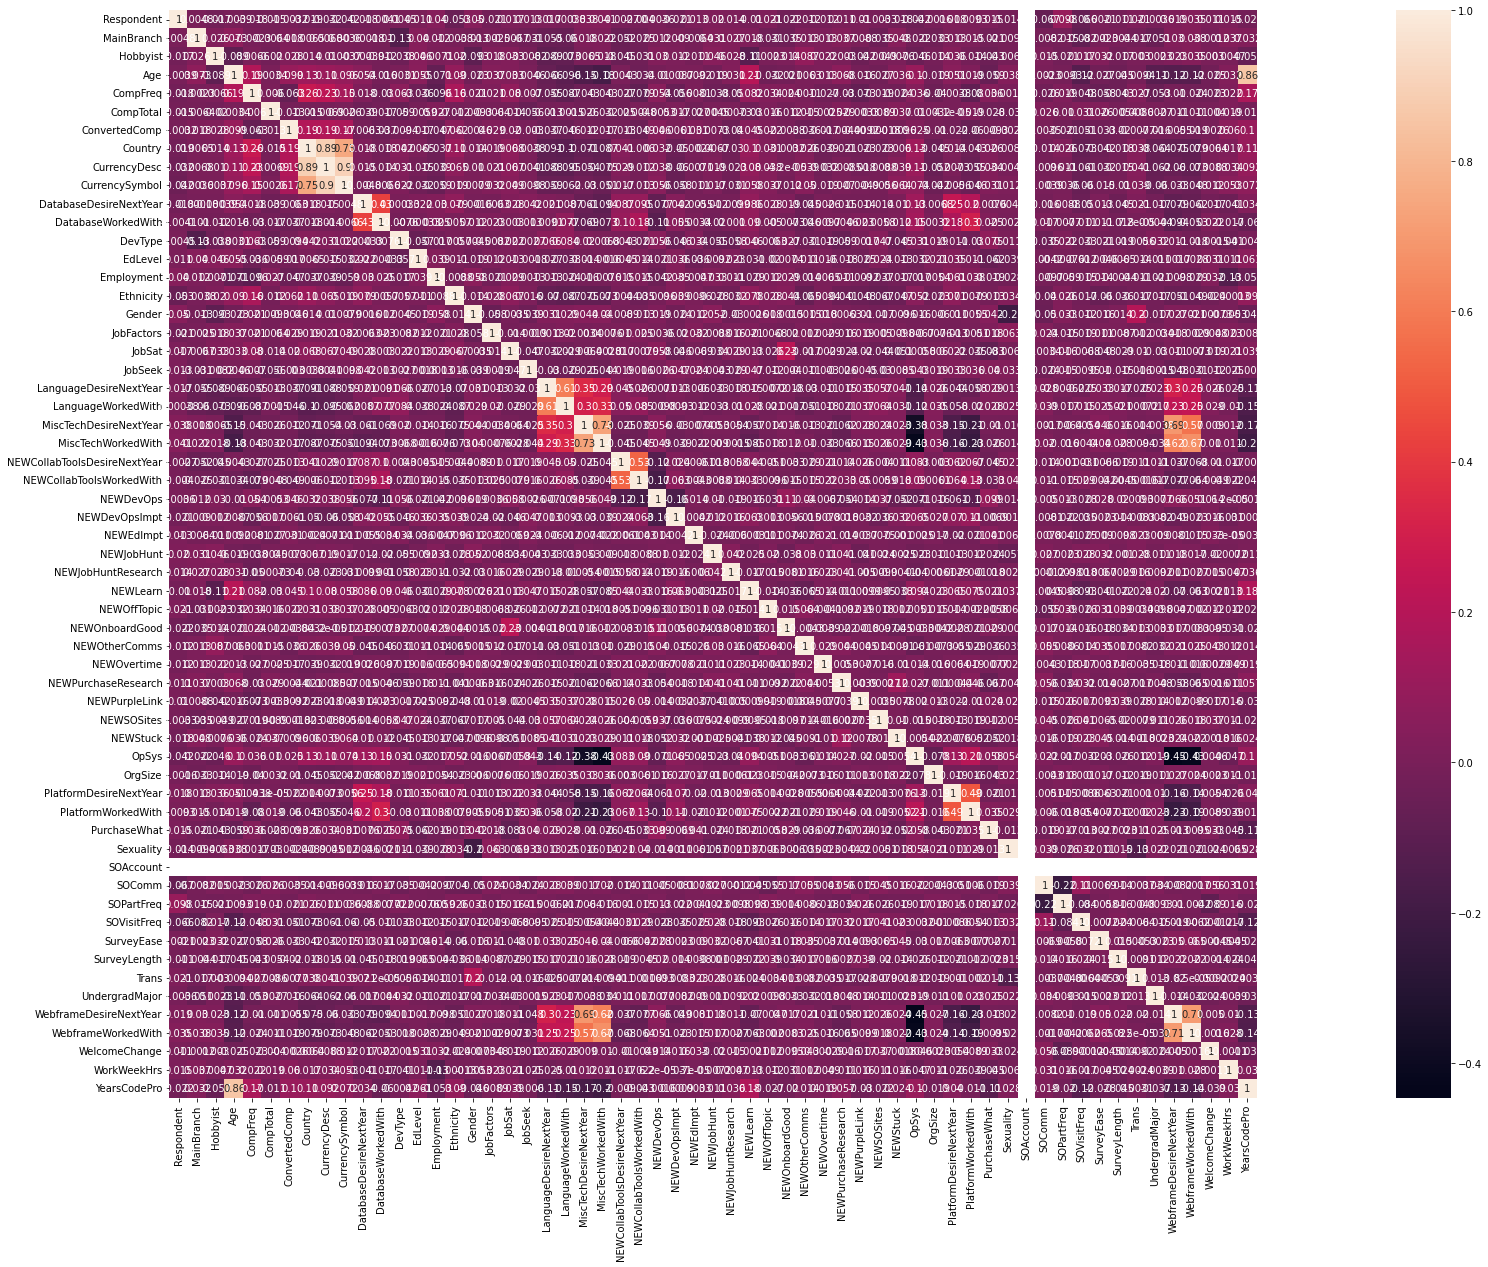

In [120]:
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(df.corr(),annot= True , square= True)

###Train test splitting

In [121]:
X= df.drop(columns= ["YearsCodePro", "YearsCode"])
Y= df["YearsCodePro"]

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=10)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [124]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, X.shape

((3370, 58), (843, 58), (3370,), (843,), (4213, 58))

###LINEAR REGRESSION MODEL

In [125]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.7677420761520845

In [126]:
Y_pred= lr.predict(X_test)
Y_pred

array([ 1.87819696e+01,  5.64918785e+00,  2.36728021e+00,  1.16581333e+01,
        2.17757213e+01,  1.14154497e+01,  4.76698124e+00,  3.61223538e+01,
        3.37530300e+00,  9.40899784e+00,  3.02358863e-01,  1.12913589e+01,
        7.64549256e+00,  1.37214217e+01,  9.26270518e+00,  5.46461580e+00,
        1.69412626e+01,  1.60577166e+01,  7.89655427e+00,  2.94845354e+00,
        1.51451458e+01,  1.22011282e+00,  4.36635135e+00,  1.14681492e+01,
        2.32384794e+01,  1.00974263e+01,  2.03974119e+01,  1.69663289e+01,
        4.67688114e+00,  3.33310021e+00,  4.04015882e+00,  6.91660293e+00,
        4.09243936e-01,  4.79326281e+00,  3.31844515e+00,  1.01657383e+01,
        1.43225148e+01,  6.02303069e+00,  9.26044622e+00,  1.76889332e+01,
        1.43043720e+01,  2.40854424e+01,  1.39129968e+01,  1.73677508e+01,
        5.81733539e+00,  3.53564276e+00,  1.61233394e+01,  8.67540471e-01,
        8.86120659e+00,  1.21905745e+01,  1.44365250e+01,  4.14649289e+00,
        1.16424127e+01,  

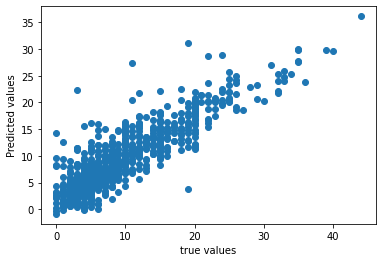

In [128]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("true values")
plt.ylabel("Predicted values")
plt.show()

###Evaluation

In [129]:
from sklearn.metrics import r2_score
accuracy= r2_score(Y_test,lr.predict(X_test))
accuracy

0.7677420761520845

###DECISION TREE REGRESSOR

In [130]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt= DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, Y_train)
accuracy= r2_score(Y_test,dt.predict(X_test))
print("Test accuracy is= ", accuracy)
  

Test accuracy is=  0.7430577290607148


### Feature Importance Using DECISION TREE REGRESSOR MODEL

In [131]:
t= DecisionTreeRegressor(max_depth= 3)
dt.fit(X_train, Y_train)  
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances


[('Age', 1.0),
 ('Respondent', 0.0),
 ('MainBranch', 0.0),
 ('Hobbyist', 0.0),
 ('CompFreq', 0.0),
 ('CompTotal', 0.0),
 ('ConvertedComp', 0.0),
 ('Country', 0.0),
 ('CurrencyDesc', 0.0),
 ('CurrencySymbol', 0.0),
 ('DatabaseDesireNextYear', 0.0),
 ('DatabaseWorkedWith', 0.0),
 ('DevType', 0.0),
 ('EdLevel', 0.0),
 ('Employment', 0.0),
 ('Ethnicity', 0.0),
 ('Gender', 0.0),
 ('JobFactors', 0.0),
 ('JobSat', 0.0),
 ('JobSeek', 0.0),
 ('LanguageDesireNextYear', 0.0),
 ('LanguageWorkedWith', 0.0),
 ('MiscTechDesireNextYear', 0.0),
 ('MiscTechWorkedWith', 0.0),
 ('NEWCollabToolsDesireNextYear', 0.0),
 ('NEWCollabToolsWorkedWith', 0.0),
 ('NEWDevOps', 0.0),
 ('NEWDevOpsImpt', 0.0),
 ('NEWEdImpt', 0.0),
 ('NEWJobHunt', 0.0),
 ('NEWJobHuntResearch', 0.0),
 ('NEWLearn', 0.0),
 ('NEWOffTopic', 0.0),
 ('NEWOnboardGood', 0.0),
 ('NEWOtherComms', 0.0),
 ('NEWOvertime', 0.0),
 ('NEWPurchaseResearch', 0.0),
 ('NEWPurpleLink', 0.0),
 ('NEWSOSites', 0.0),
 ('NEWStuck', 0.0),
 ('OpSys', 0.0),
 ('OrgSiz

###CONCLUSION


**Problem Statement**= 
Create a model that can predict number of Years' experience a respondent has had programming.

**Task**= I divide the task into 2 section, 

1.section1= Exploratory Data analysis of all important features, i used barplot for categorical features. Use heatmap for correaltion.


2.section2= I apply machine learning algorithms on regression problem. 
1) split the features and target
2) use train test splitting
3) then use linear regression model and Decision tree model for problem


**Tools**= I used python libraries pandas for data cleaning and Data Analytics, Matplotlib, seaborn for Data Visualization and sklearn for machine learining algorithm


**Result**= R2 score is 0.7787366910952961 using Decision Tree Regressor
**Important Featrure**= Age column is most important feature

